<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/5_Big_Data_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spark  SQL Avanzado**



# Descargando e instalando Sparken colab

In [1]:
# Instalar SDK Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Descargar Spark 3.2.2
!wget -q https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [3]:
# Descomprimir el archivo descargado de Spark
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [4]:
# Establecer las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [5]:
# Instalar la librería findspark
!pip install -q findspark

In [6]:
# Instalar pyspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [7]:
### verificar la instalación ###

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

# agragaciones

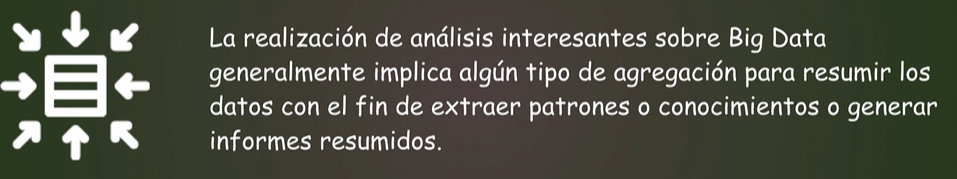

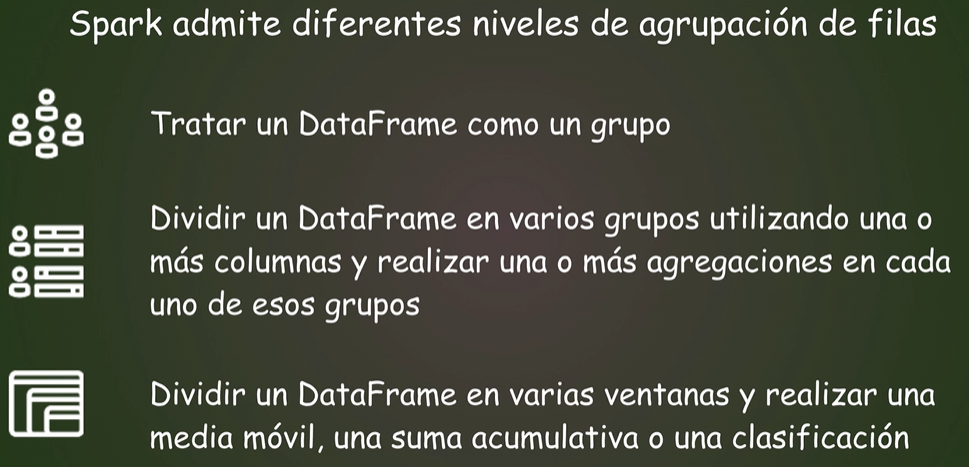

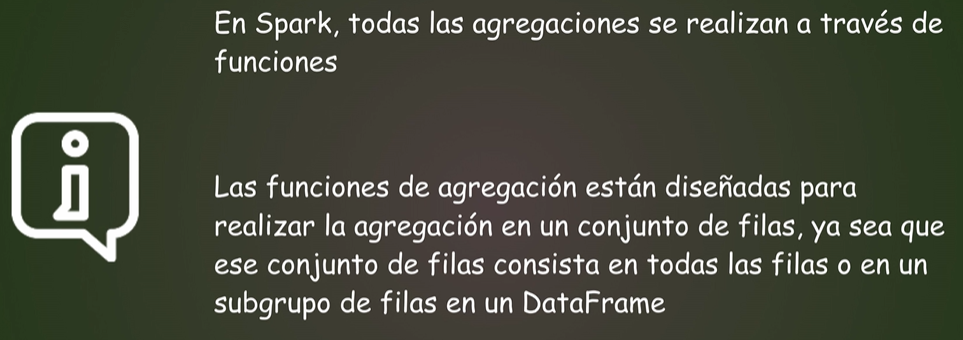

# Explorando los datos

In [8]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [56]:
df = spark.read.parquet('./data/vuelos.parquet')

In [83]:
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [84]:
df.show(20, truncate=False)

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

# Funciones count, countDistinct y approx_count_distinct

In [81]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [88]:
df = spark.read.parquet('./data/dataframe.parquet')

In [89]:
df.printSchema()

root
 |-- nombre: string (nullable = true)
 |-- color: string (nullable = true)
 |-- cantidad: long (nullable = true)



In [90]:
df.show()


+------+-----+--------+
|nombre|color|cantidad|
+------+-----+--------+
|  Jose| azul|    1900|
|  null| null|    1700|
|  null| rojo|    1300|
|  Juan| rojo|    1500|
+------+-----+--------+



In [91]:
# count
from pyspark.sql.functions import count

In [94]:
df.select(
    count('nombre').alias('conteo_nombre'),
    count('color').alias('conteo_color')
).show()

+-------------+------------+
|conteo_nombre|conteo_color|
+-------------+------------+
|            2|           3|
+-------------+------------+



In [95]:
# conteo general
df.select(
    count('nombre').alias('conteo_nombre'),
    count('color').alias('conteo_color'),
    count('*').alias('conteo_general')
).show()

+-------------+------------+--------------+
|conteo_nombre|conteo_color|conteo_general|
+-------------+------------+--------------+
|            2|           3|             4|
+-------------+------------+--------------+



In [93]:
# countDistinct

from pyspark.sql.functions import countDistinct

df.select(
    countDistinct('color').alias('colores_dif')
).show()


+-----------+
|colores_dif|
+-----------+
|          2|
+-----------+



In [96]:
# approx_count_distinct

from pyspark.sql.functions import approx_count_distinct

In [97]:
dataframe = spark.read.parquet('./data/vuelos.parquet')

dataframe.printSchema()


root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [98]:
dataframe.select(
    countDistinct('AIRLINE'),
    approx_count_distinct('AIRLINE')
).show()

+-----------------------+------------------------------+
|count(DISTINCT AIRLINE)|approx_count_distinct(AIRLINE)|
+-----------------------+------------------------------+
|                     14|                            13|
+-----------------------+------------------------------+



# Funciones min y max

In [99]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [104]:
vuelos = spark.read.parquet('/content/data/vuelos.parquet')

vuelos.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [105]:
from pyspark.sql.functions import min, max, col

vuelos.select(
    min('AIR_TIME').alias('menor_timepo'),
    max('AIR_TIME').alias('mayor_tiempo')
).show()

+------------+------------+
|menor_timepo|mayor_tiempo|
+------------+------------+
|           7|         690|
+------------+------------+



In [106]:
vuelos.select(
    min('AIRLINE_DELAY'),
    max('AIRLINE_DELAY')
).show()

+------------------+------------------+
|min(AIRLINE_DELAY)|max(AIRLINE_DELAY)|
+------------------+------------------+
|                 0|              1971|
+------------------+------------------+



# Funciones sum, sumDistinct y avg

In [107]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [108]:
vuelos = spark.read.parquet('./data/vuelos.parquet')

In [109]:

from pyspark.sql.functions import sum, sumDistinct, avg, count

# sum

vuelos.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [110]:
vuelos.select(
    sum('DISTANCE').alias('sum_dis')
).show()

+----------+
|   sum_dis|
+----------+
|4785357409|
+----------+



In [111]:
# sumDistinct

vuelos.select(
    sumDistinct('DISTANCE').alias('sum_dis_dif')
).show()

/content/spark-3.2.3-bin-hadoop3.2/python/pyspark/sql/functions.py:215: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+-----------+
|sum_dis_dif|
+-----------+
|    1442300|
+-----------+



In [112]:

# avg

vuelos.select(
    avg('AIR_TIME').alias('promedio_aire'),
    (sum('AIR_TIME') / count('AIR_TIME')).alias('prom_manual')
).show()

+------------------+------------------+
|     promedio_aire|       prom_manual|
+------------------+------------------+
|113.51162809012519|113.51162809012519|
+------------------+------------------+



# Agregación con agrupación

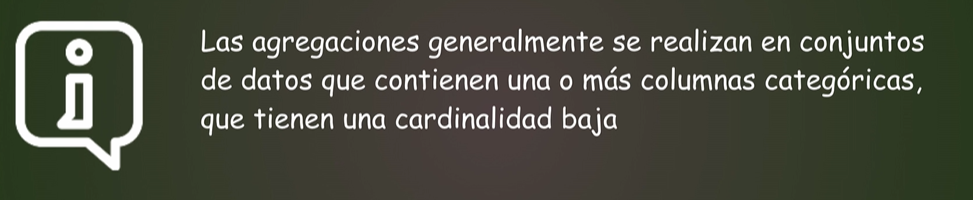

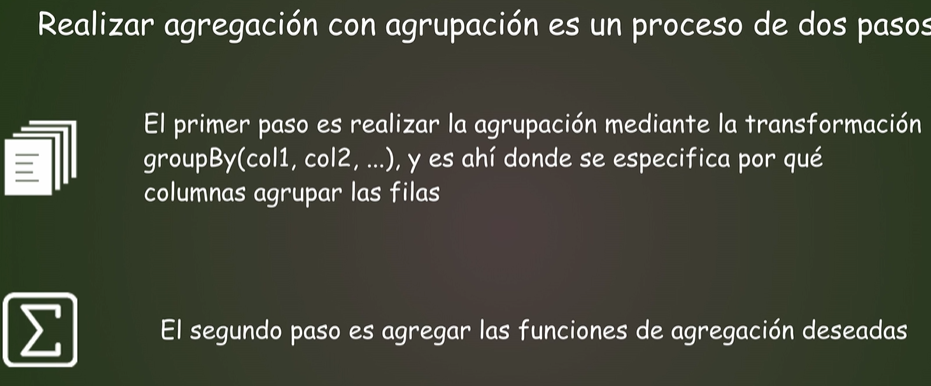

In [114]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [115]:
vuelos = spark.read.parquet('./data/vuelos.parquet')

vuelos.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [116]:
# contar todo los vuelos de airopuerto origen
from pyspark.sql.functions import desc

(vuelos.groupBy('ORIGIN_AIRPORT')
    .count()
    .orderBy(desc('count'))
).show()

+--------------+------+
|ORIGIN_AIRPORT| count|
+--------------+------+
|           ATL|346836|
|           ORD|285884|
|           DFW|239551|
|           DEN|196055|
|           LAX|194673|
|           SFO|148008|
|           PHX|146815|
|           IAH|146622|
|           LAS|133181|
|           MSP|112117|
|           MCO|110982|
|           SEA|110899|
|           DTW|108500|
|           BOS|107847|
|           EWR|101772|
|           CLT|100324|
|           LGA| 99605|
|           SLC| 97210|
|           JFK| 93811|
|           BWI| 86079|
+--------------+------+
only showing top 20 rows



In [117]:

(vuelos.groupBy('ORIGIN_AIRPORT', 'DESTINATION_AIRPORT')
    .count()
    .orderBy(desc('count'))
).show()

+--------------+-------------------+-----+
|ORIGIN_AIRPORT|DESTINATION_AIRPORT|count|
+--------------+-------------------+-----+
|           SFO|                LAX|13744|
|           LAX|                SFO|13457|
|           JFK|                LAX|12016|
|           LAX|                JFK|12015|
|           LAS|                LAX| 9715|
|           LGA|                ORD| 9639|
|           LAX|                LAS| 9594|
|           ORD|                LGA| 9575|
|           SFO|                JFK| 8440|
|           JFK|                SFO| 8437|
|           OGG|                HNL| 8313|
|           HNL|                OGG| 8282|
|           LAX|                ORD| 8256|
|           ATL|                LGA| 8234|
|           LGA|                ATL| 8215|
|           ATL|                MCO| 8202|
|           MCO|                ATL| 8202|
|           SFO|                LAS| 7995|
|           ORD|                LAX| 7941|
|           LAS|                SFO| 7870|
+----------

# Varias agregaciones por grupo

In [118]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [119]:
vuelos = spark.read.parquet('./data/vuelos.parquet')

In [120]:
# para ver el tiempo que estaba en el aire el avion y el min y max de tiempo en el aire
from pyspark.sql.functions import count, min, max, desc, avg

vuelos.groupBy('ORIGIN_AIRPORT').agg(
    count('AIR_TIME').alias('tiempo_aire'),
    min('AIR_TIME').alias('min'),
    max('AIR_TIME').alias('max')
).orderBy(desc('tiempo_aire')).show()

+--------------+-----------+---+---+
|ORIGIN_AIRPORT|tiempo_aire|min|max|
+--------------+-----------+---+---+
|           ATL|     343506| 15|614|
|           ORD|     276554| 13|571|
|           DFW|     232647| 11|534|
|           DEN|     193402| 12|493|
|           LAX|     192003| 14|409|
|           PHX|     145552| 19|444|
|           SFO|     145491|  8|389|
|           IAH|     144019| 15|524|
|           LAS|     131937| 25|429|
|           MSP|     111055| 14|537|
|           SEA|     110178| 17|412|
|           MCO|     109532| 25|395|
|           DTW|     106992| 15|341|
|           BOS|     104804| 16|432|
|           CLT|      99052| 17|379|
|           EWR|      98341| 21|683|
|           SLC|      96505| 18|419|
|           LGA|      94834| 19|311|
|           JFK|      91663| 29|690|
|           BWI|      84329| 19|398|
+--------------+-----------+---+---+
only showing top 20 rows



In [121]:
vuelos.groupBy('MONTH').agg(
    count('ARRIVAL_DELAY').alias('conteo_de_retrasos'),
    avg('DISTANCE').alias('prom_dist')
).orderBy(desc('conteo_de_retrasos')).show()

+-----+------------------+-----------------+
|MONTH|conteo_de_retrasos|        prom_dist|
+-----+------------------+-----------------+
|    7|            514384|841.4772794487611|
|    8|            503956|834.8244276603413|
|    6|            492847|835.6302716626612|
|    3|            492138|816.0553268611494|
|    5|            489641|823.3230588760807|
|   10|            482878|816.4436127652134|
|    4|            479251|817.0060476016745|
|   12|            469717|837.8018926194103|
|   11|            462367|820.2482434846529|
|    9|            462153|815.8487523282274|
|    1|            457013|803.2612794913696|
|    2|            407663| 800.785449834689|
+-----+------------------+-----------------+



# Agregación con pivote


In [122]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [123]:
estudiantes = spark.read.parquet('./data/estudiantes.parquet')

In [124]:

estudiantes.show()

+------+----+----+----------+
|nombre|sexo|peso|graduacion|
+------+----+----+----------+
|  Jose|   M|  80|      2000|
| Hilda|   F|  50|      2000|
|  Juan|   M|  75|      2000|
| Pedro|   M|  76|      2001|
|Katia+|   F|  65|      2001|
+------+----+----+----------+



In [125]:
# como hallar el promedio por año de graduacion y sexo
from pyspark.sql.functions import min, max, avg, col

estudiantes.groupBy('graduacion').pivot('sexo').agg(avg('peso')).show()

+----------+----+----+
|graduacion|   F|   M|
+----------+----+----+
|      2001|65.0|76.0|
|      2000|50.0|77.5|
+----------+----+----+



In [126]:
#
estudiantes.groupBy('graduacion').pivot('sexo').agg(avg('peso'), min('peso'), max('peso')).show()

+----------+-----------+-----------+-----------+-----------+-----------+-----------+
|graduacion|F_avg(peso)|F_min(peso)|F_max(peso)|M_avg(peso)|M_min(peso)|M_max(peso)|
+----------+-----------+-----------+-----------+-----------+-----------+-----------+
|      2001|       65.0|         65|         65|       76.0|         76|         76|
|      2000|       50.0|         50|         50|       77.5|         75|         80|
+----------+-----------+-----------+-----------+-----------+-----------+-----------+



In [127]:
# solo masculino
estudiantes.groupBy('graduacion').pivot('sexo', ['M']).agg(avg('peso'), min('peso'), max('peso')).show()


+----------+-----------+-----------+-----------+
|graduacion|M_avg(peso)|M_min(peso)|M_max(peso)|
+----------+-----------+-----------+-----------+
|      2001|       76.0|         76|         76|
|      2000|       77.5|         75|         80|
+----------+-----------+-----------+-----------+



In [128]:
# solo para femenino
estudiantes.groupBy('graduacion').pivot('sexo', ['F']).agg(avg('peso'), min('peso'), max('peso')).show()

+----------+-----------+-----------+-----------+
|graduacion|F_avg(peso)|F_min(peso)|F_max(peso)|
+----------+-----------+-----------+-----------+
|      2001|       65.0|         65|         65|
|      2000|       50.0|         50|         50|
+----------+-----------+-----------+-----------+



In [129]:
# Inner Join

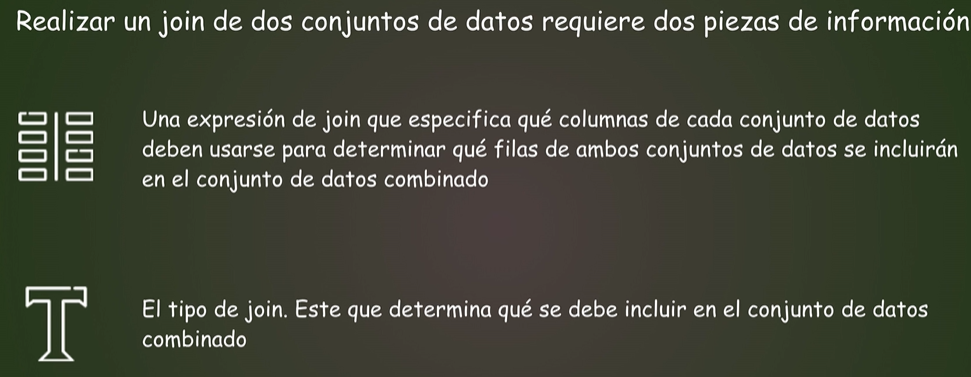

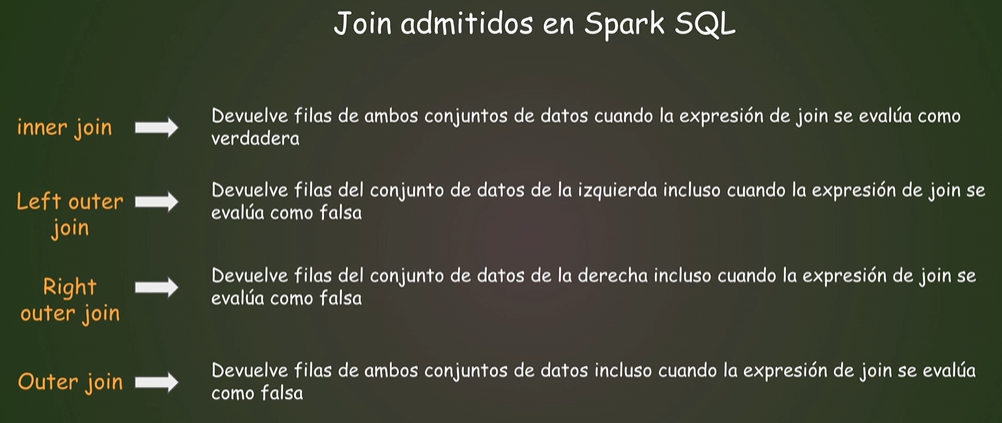

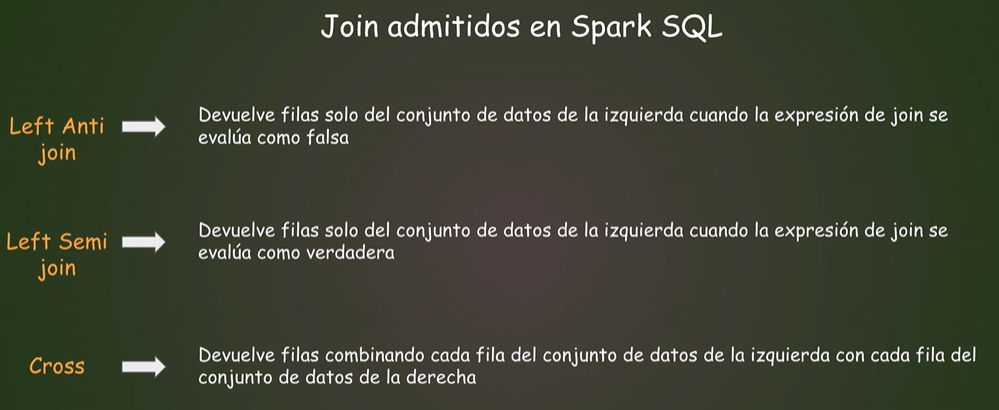

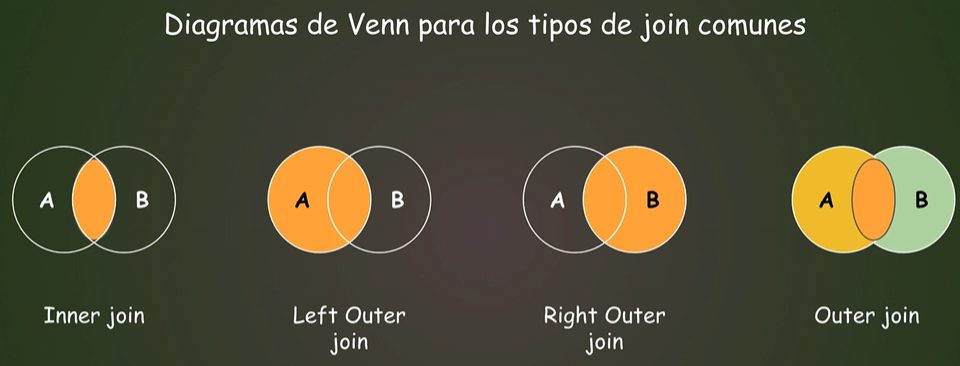

In [131]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [132]:
empleados = spark.read.parquet('./data/empleados.parquet')

In [133]:
departamentos = spark.read.parquet('./data/departamentos.parquet')

In [134]:
empleados.show()

+------+--------+
|nombre|num_dpto|
+------+--------+
|  Luis|      33|
| Katia|      33|
|  Raul|      34|
| Pedro|       0|
| Laura|      34|
|Sandro|      31|
+------+--------+



In [135]:
departamentos.show()

+---+-----------+
| id|nombre_dpto|
+---+-----------+
| 31|     letras|
| 33|    derecho|
| 34| matemática|
| 35|informática|
+---+-----------+



In [136]:
# Inner join

from pyspark.sql.functions import col

join_df = empleados.join(departamentos, col('num_dpto') == col('id'))

In [137]:

join_df.show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [138]:

join_df = empleados.join(departamentos, col('num_dpto') == col('id'), 'inner')

In [139]:
join_df.show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [140]:
join_df = empleados.join(departamentos).where(col('num_dpto') == col('id'))

join_df.show()


+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



# Left Outer Join

In [12]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [13]:
empleados = spark.read.parquet('./data/empleados.parquet')

departamentos = spark.read.parquet('./data/departamentos.parquet')

In [14]:

from pyspark.sql.functions import col
empleados.join(departamentos, col('num_dpto') == col('id'), 'leftouter').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [15]:
empleados.join(departamentos, col('num_dpto') == col('id'), 'left_outer').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [16]:
empleados.join(departamentos, col('num_dpto') == col('id'), 'left').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



# Right Outer Join

In [17]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [18]:
empleados = spark.read.parquet('./data/empleados.parquet')

departamentos = spark.read.parquet('./data/departamentos.parquet')

In [19]:
from pyspark.sql.functions import col
empleados.join(departamentos, col('num_dpto') == col('id'), 'rightouter').show()


+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|Sandro|      31| 31|     letras|
| Katia|      33| 33|    derecho|
|  Luis|      33| 33|    derecho|
| Laura|      34| 34| matemática|
|  Raul|      34| 34| matemática|
|  null|    null| 35|informática|
+------+--------+---+-----------+



In [20]:
empleados.join(departamentos, col('num_dpto') == col('id'), 'right_outer').show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|Sandro|      31| 31|     letras|
| Katia|      33| 33|    derecho|
|  Luis|      33| 33|    derecho|
| Laura|      34| 34| matemática|
|  Raul|      34| 34| matemática|
|  null|    null| 35|informática|
+------+--------+---+-----------+



In [21]:
empleados.join(departamentos, col('num_dpto') == col('id'), 'right').show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|Sandro|      31| 31|     letras|
| Katia|      33| 33|    derecho|
|  Luis|      33| 33|    derecho|
| Laura|      34| 34| matemática|
|  Raul|      34| 34| matemática|
|  null|    null| 35|informática|
+------+--------+---+-----------+



# Full Outer Join

In [22]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [23]:
empleados = spark.read.parquet('./data/empleados.parquet')

departamentos = spark.read.parquet('./data/departamentos.parquet')

In [24]:
from pyspark.sql.functions import col

empleados.join(departamentos, col('num_dpto') == col('id'), 'outer').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
| Pedro|       0|null|       null|
|Sandro|      31|  31|     letras|
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Laura|      34|  34| matemática|
|  null|    null|  35|informática|
+------+--------+----+-----------+



# Left Anti Join

In [25]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [26]:
empleados = spark.read.parquet('./data/empleados.parquet')

departamentos = spark.read.parquet('./data/departamentos.parquet')

In [27]:
from pyspark.sql.functions import col
empleados.join(departamentos, col('num_dpto') == col('id'), 'left_anti').show()

+------+--------+
|nombre|num_dpto|
+------+--------+
| Pedro|       0|
+------+--------+



In [28]:
departamentos.join(empleados, col('num_dpto') == col('id'), 'left_anti').show()

+---+-----------+
| id|nombre_dpto|
+---+-----------+
| 35|informática|
+---+-----------+



# Left Semi Join

In [29]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [30]:
empleados = spark.read.parquet('./data/empleados.parquet')

departamentos = spark.read.parquet('./data/departamentos.parquet')

In [31]:
#que trabajadores estan asignado a un depratamentos
from pyspark.sql.functions import col
empleados.join(departamentos, col('num_dpto') == col('id'), 'left_semi').show()

+------+--------+
|nombre|num_dpto|
+------+--------+
|  Luis|      33|
| Katia|      33|
|  Raul|      34|
| Laura|      34|
|Sandro|      31|
+------+--------+



# Cross Join

In [32]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [33]:
empleados = spark.read.parquet('./data/empleados.parquet')

departamentos = spark.read.parquet('./data/departamentos.parquet')

In [34]:
from pyspark.sql.functions import col
df = empleados.crossJoin(departamentos)

In [35]:
df.show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 31|     letras|
|  Luis|      33| 33|    derecho|
|  Luis|      33| 34| matemática|
|  Luis|      33| 35|informática|
| Katia|      33| 31|     letras|
| Katia|      33| 33|    derecho|
| Katia|      33| 34| matemática|
| Katia|      33| 35|informática|
|  Raul|      34| 31|     letras|
|  Raul|      34| 33|    derecho|
|  Raul|      34| 34| matemática|
|  Raul|      34| 35|informática|
| Pedro|       0| 31|     letras|
| Pedro|       0| 33|    derecho|
| Pedro|       0| 34| matemática|
| Pedro|       0| 35|informática|
| Laura|      34| 31|     letras|
| Laura|      34| 33|    derecho|
| Laura|      34| 34| matemática|
| Laura|      34| 35|informática|
+------+--------+---+-----------+
only showing top 20 rows



In [36]:
df.count()

24

# Manejo de nombres de columnas duplicados

In [37]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [38]:
empleados = spark.read.parquet('./data/empleados.parquet')

departamentos = spark.read.parquet('./data/departamentos.parquet')

In [39]:
from pyspark.sql.functions import col
depa = departamentos.withColumn('num_dpto', col('id'))

In [40]:
depa.printSchema()

root
 |-- id: long (nullable = true)
 |-- nombre_dpto: string (nullable = true)
 |-- num_dpto: long (nullable = true)



In [41]:
empleados.printSchema()

root
 |-- nombre: string (nullable = true)
 |-- num_dpto: long (nullable = true)



In [42]:
# Devuelve un error
empleados.join(depa, col('num_dpto') == col('num_dpto'))

AnalysisException: Reference 'num_dpto' is ambiguous, could be: num_dpto, num_dpto.

In [45]:

# Forma correcta

df_con_duplicados = empleados.join(depa, empleados['num_dpto'] == depa['num_dpto'])

In [46]:
df_con_duplicados.printSchema()

root
 |-- nombre: string (nullable = true)
 |-- num_dpto: long (nullable = true)
 |-- id: long (nullable = true)
 |-- nombre_dpto: string (nullable = true)
 |-- num_dpto: long (nullable = true)



In [47]:
df_con_duplicados.select(empleados['num_dpto']).show()


+--------+
|num_dpto|
+--------+
|      33|
|      33|
|      34|
|      34|
|      31|
+--------+



In [48]:
df2 = empleados.join(depa, 'num_dpto')

In [49]:
df2.printSchema()

root
 |-- num_dpto: long (nullable = true)
 |-- nombre: string (nullable = true)
 |-- id: long (nullable = true)
 |-- nombre_dpto: string (nullable = true)



In [50]:
empleados.join(depa, ['num_dpto']).printSchema()

root
 |-- num_dpto: long (nullable = true)
 |-- nombre: string (nullable = true)
 |-- id: long (nullable = true)
 |-- nombre_dpto: string (nullable = true)



# Shuffle Hash Join y Broadcast Hash Join

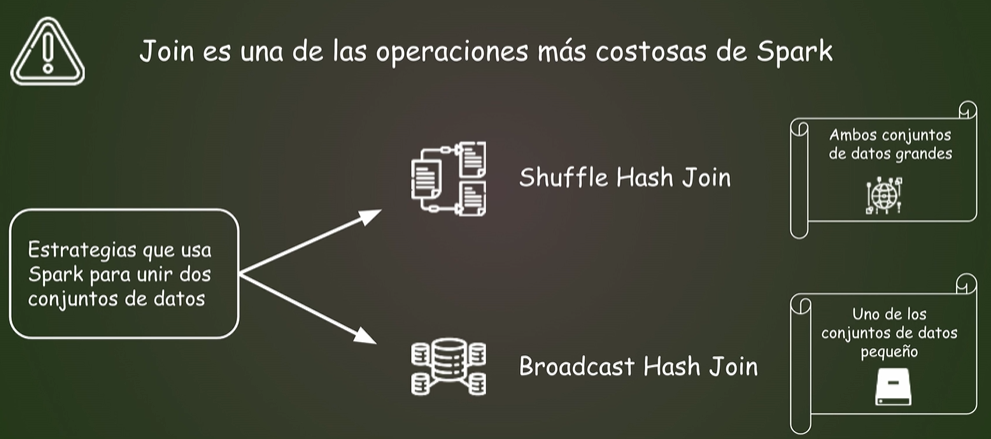

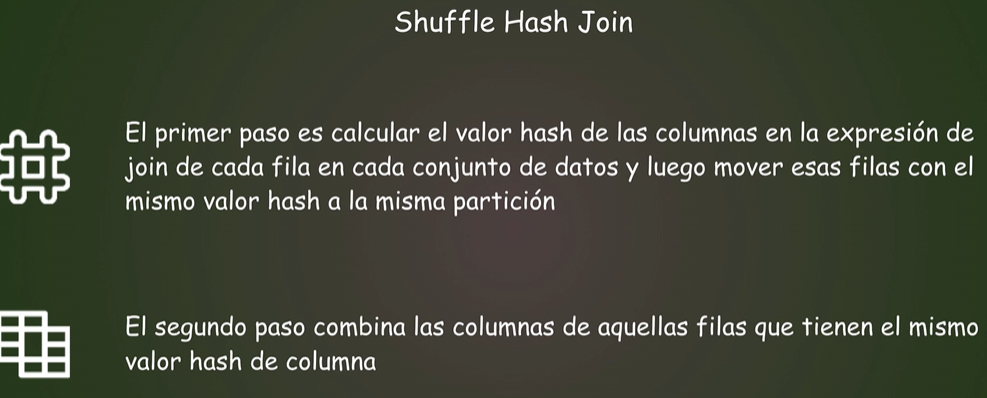

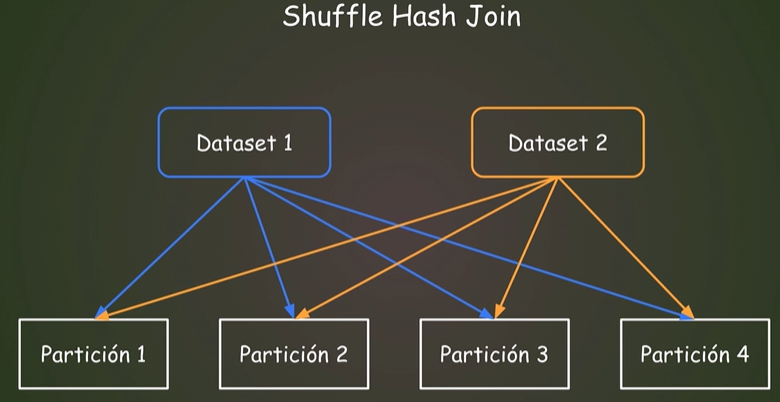

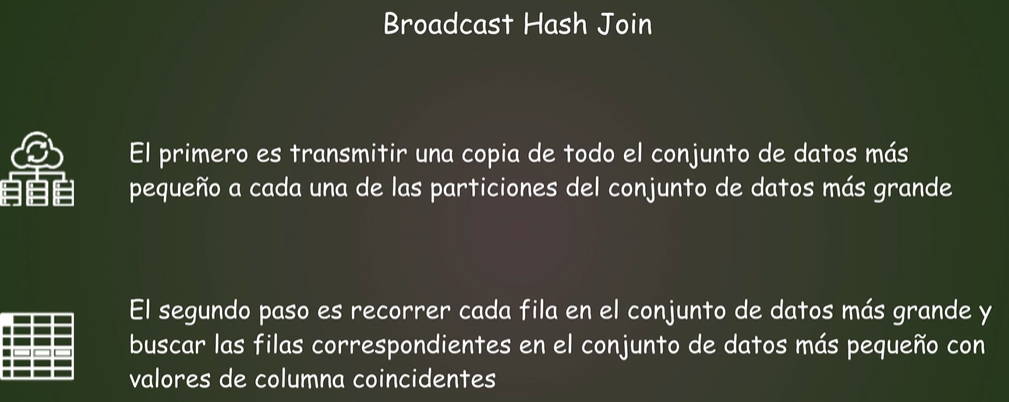

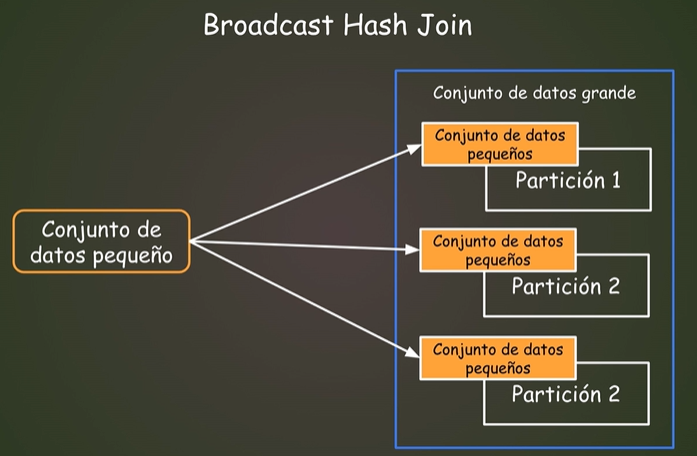

In [51]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [52]:
empleados = spark.read.parquet('./data/empleados.parquet')
departamentos = spark.read.parquet('./data/departamentos.parquet')

In [53]:
from pyspark.sql.functions import col, broadcast
empleados.join(broadcast(departamentos), col('num_dpto') == col('id')).show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [55]:
empleados.join(broadcast(departamentos), col('num_dpto') == col('id')).explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- BroadcastHashJoin [num_dpto#370L], [id#373L], Inner, BuildRight, false
   :- Filter isnotnull(num_dpto#370L)
   :  +- FileScan parquet [nombre#369,num_dpto#370L] Batched: true, DataFilters: [isnotnull(num_dpto#370L)], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/content/data/empleados.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(num_dpto)], ReadSchema: struct<nombre:string,num_dpto:bigint>
   +- BroadcastExchange HashedRelationBroadcastMode(List(input[0, bigint, false]),false), [plan_id=1329]
      +- Filter isnotnull(id#373L)
         +- FileScan parquet [id#373L,nombre_dpto#374] Batched: true, DataFilters: [isnotnull(id#373L)], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/content/data/departamentos.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(id)], ReadSchema: struct<id:bigint,nombre_dpto:string>


